## Plotting the gap

In [22]:
from quspin.operators import hamiltonian# operators
from quspin.basis import boson_basis_1d # Hilbert space boson basis
from quspin.basis import tensor_basis,spinless_fermion_basis_1d # Hilbert spaces
from quspin.basis import spin_basis_1d # Hilbert space spin basis
from quspin.tools.measurements import obs_vs_time # calculating dynamics
import numpy as np # general math functions
import matplotlib.pyplot as plt

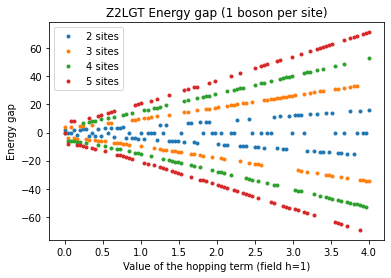

In [73]:
set=[]
for j in range(2,6):
    ###### parameters
    L_boson = j # system size
    L_spin = L_boson-1
    cutoff = j+1
    total_boson_number = L_boson
    h = 1 # field strength
    t_min = 0 # hopping strength
    t_max = 4
    numberofvaluesof_t = 100
    tvals=np.linspace(t_min,t_max,numberofvaluesof_t)
    ###### create the basis
    # building the two bases to tensor together
    basis_spin = spin_basis_1d(L=L_spin)
    basis_boson=boson_basis_1d(L=L_boson,sps=cutoff,Nb=total_boson_number)
    basis = tensor_basis(basis_spin,basis_boson)
    # print(basis)

    # Different system sizes and number of bosons - choose number of bosons to be equal to the system size

    deltas=np.zeros((2,len(tvals)))
    for i in range(len(tvals)):
        t=tvals[i]
        ##### create model
        hop=[[-t,i,i,i+1] for i in range(L_boson-1)]
        field = [[-h,i] for i in range(L_spin)]
        static=[["z|+-",hop],["z|-+",hop],["x|",field]]
        ###### setting up operators
        # set up hamiltonian dictionary and observable (imbalance I)
        no_checks = dict(check_pcon=False,check_symm=False,check_herm=False)
        H = hamiltonian(static,[],basis=basis,**no_checks)
        E, _ = H.eigsh(k=2)
        delta=E[1]-E[0]
        deltas[0][i]=t
        deltas[1][i]=delta

    set.append(deltas)

plt.title("Z2LGT Energy gap (1 boson per site)")
for i in range(len(set)):
    plt.plot(set[i][0],set[i][1],".",label=str(i+2)+" sites")
plt.xlabel("Value of the hopping term (field h=1)")
plt.ylabel("Energy gap")
plt.legend()